# Introducción

Para la empresa petrolera se busca el mejor sitio para abrir 200 nuevos pozos petroleros con la información de 3 sitios diferente

# Contenido



## Inicialización

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import (train_test_split,
                                     GridSearchCV)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, 
                             recall_score, 
                             precision_score, 
                             f1_score, r2_score, 
                             mean_absolute_error,
                             mean_squared_error,
                             roc_curve, 
                             roc_auc_score, 
                             precision_recall_curve)
import warnings

In [2]:
warnings.simplefilter("ignore")

### Carga de datos en los datasets y EDA

In [3]:
try:
    df_zone1 = pd.read_csv('geo_data_0.csv')
    df_zone2 = pd.read_csv('geo_data_1.csv')
    df_zone3 = pd.read_csv('geo_data_2.csv')
except:
    df_zone1 = pd.read_csv('/datasets/geo_data_0.csv')
    df_zone2 = pd.read_csv('/datasets/geo_data_1.csv')
    df_zone3 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
state=np.random.RandomState(12345)

### Preparación de datos y EDA

#### Zona 1

In [5]:
df_zone1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_zone1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Se buscarán valores duplicados

In [7]:
df_zone1.duplicated().sum()

0

In [8]:
df_zone1['id'].duplicated().sum()

10

Se eliminarán los valores duplicados, dejando un solo registro por pozo de la zona 1

In [9]:
df_zone1.drop_duplicates(subset=['id'],inplace=True)

In [10]:
df_zone1.reset_index(drop=True,inplace=True)

Se buscan valores nulos en el DataSet

In [11]:
df_zone1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

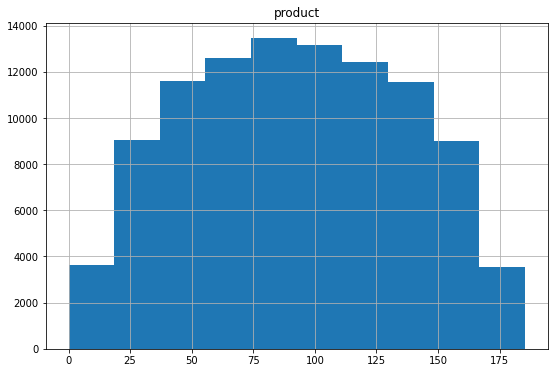

In [12]:
df_zone1.hist(column='product',
             grid=True,
              bins=10,
              figsize=(9,6)
             )
plt.show()

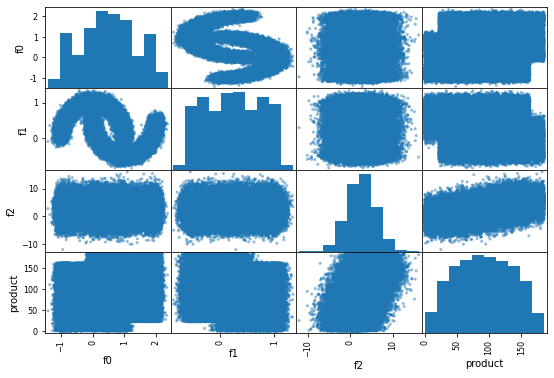

In [13]:
pd.plotting.scatter_matrix(df_zone1, figsize=(9,6))
plt.show()

### Zona 2

In [14]:
df_zone2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
df_zone2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [16]:
df_zone2.duplicated().sum()

0

In [17]:
df_zone2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

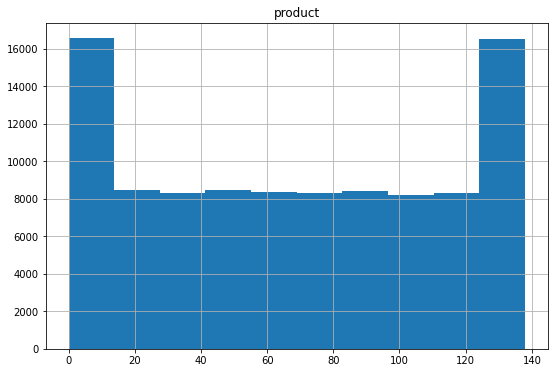

In [18]:
df_zone2.hist(column='product',
             grid=True,
              bins=10,
              figsize=(9,6)
             )
plt.show()

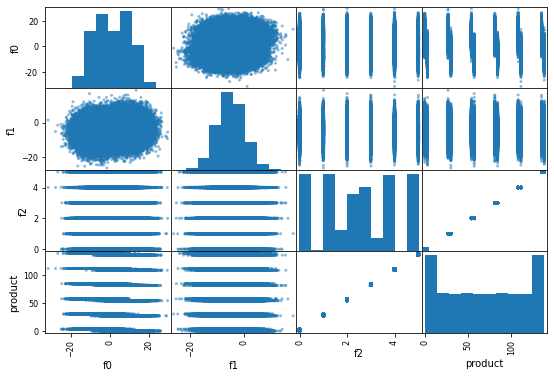

In [19]:
pd.plotting.scatter_matrix(df_zone2, figsize=(9,6))
plt.show()

### Zona3

In [20]:
df_zone3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [21]:
df_zone3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [22]:
df_zone3.duplicated().sum()

0

In [23]:
df_zone3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

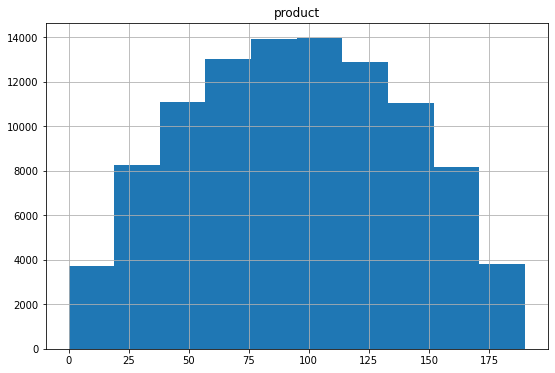

In [24]:
df_zone3.hist(column='product',
             grid=True,
              bins=10,
              figsize=(9,6)
             )
plt.show()

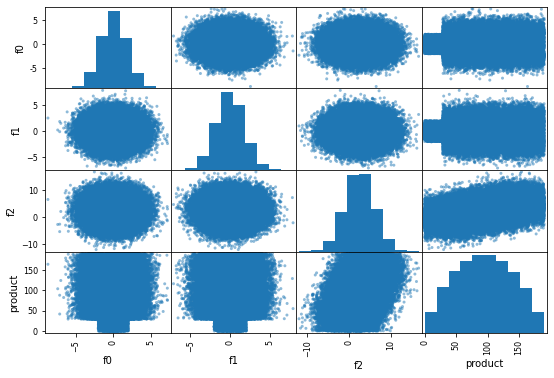

In [25]:
pd.plotting.scatter_matrix(df_zone3, figsize=(9,6))
plt.show()

## Funciones para trabajar DataSet

### Función Preparación conjunto de datos

In [26]:
def preparacion(df):
    
    #Creación de conjunto de datos en features y target:
    target = df['product']
    features = df.drop(['product','id'], axis = 1)
    
    #División los conjuntos de datos en train y valid
    features_train, features_valid, target_train, target_valid = (
    train_test_split(features, target, test_size = 0.25, random_state = state))
    
    #Escalado estándar
    numeric = ['f0','f1','f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    return features_train, target_train, features_valid, target_valid

#### Creación de conjunto de datos para Datasets por zona

Se crean los conjuntos de entrenamiento y validación para cada conjunto de datos

In [27]:
features_train1, target_train1, features_valid1, target_valid1 = preparacion(df_zone1)
features_train2, target_train2, features_valid2, target_valid2 = preparacion(df_zone2)
features_train3, target_train3, features_valid3, target_valid3 = preparacion(df_zone3)

In [28]:
features_train1.head()

,f0,f1,f2
75161,0.776287,-1.255120,-0.067528
43240,-1.580378,-0.176704,-1.281795
91987,-0.646319,0.136966,-0.505430
5094,-0.509367,1.253916,-0.856553
78245,-0.737723,1.534093,-0.372715


### Función para modelos

In [29]:
def models(features_train, target_train, features_valid, target_valid):
    #Se entrena el modelo a usar
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    #Calculo de predicciones y RSME
    predictions = model.predict(features_valid)

    #Retorno de predicciones
    return predictions

#### Datos de predicciones por Zona

In [30]:
predicion_z1 = pd.Series(models(features_train1, target_train1, features_valid1, target_valid1))
print('El valor de volumen promedio de la Zona 1 es: ', predicion_z1.mean())

El valor de volumen promedio de la Zona 1 es:  92.78915638280621


In [31]:
predicion_z2 = pd.Series(models(features_train2, target_train2, features_valid2, target_valid2))
print('El valor de volumen promedio de la Zona 1 es: ', predicion_z2.mean())

El valor de volumen promedio de la Zona 1 es:  68.76995145799754


In [32]:
predicion_z3 = pd.Series(models(features_train3, target_train3, features_valid3, target_valid3))
print('El valor de volumen promedio de la Zona 1 es: ', predicion_z3.mean())

El valor de volumen promedio de la Zona 1 es:  95.087528122523


Con estos valores de la producción en volumne estimada por zona, la zona 3 es la más rentable, se calculará el error de la estimación para verificar este valor.

### Cálculo de errores

In [33]:
print(f'Zona 1 RSME= {mean_squared_error(target_valid1, predicion_z1)**0.5:.2f}')
print(f'Zona 2 RSME= {mean_squared_error(target_valid2, predicion_z2)**0.5:.2f}')
print(f'Zona 3 RSME= {mean_squared_error(target_valid3, predicion_z3)**0.5:.2f}')

Zona 1 RSME= 37.85
Zona 2 RSME= 0.89
Zona 3 RSME= 39.96


El error de pérdida es menor en la zona 2, aunque tiene la menor producción en volumen es el conjunto que mejor desempeño muestra de momento.

### Conclusiones predicciones

Con la información obtenida de los modelos de datos, la zona número 2 es la que mejor predicción tiene ya que muestra el menor error de las 3.
Continuaremos el trabajo usando este conjunto de datos y modelo.

## Cálculo de ganancias

In [34]:
# Datos para siguientes cálculos:

invest = 100000000
n = 200 #Número de pozos nuevos
prod_min = 500000 #Ganancias por unidades
usd_per_barrel = 4.5 #USD

costo_pozo = invest / n
ROI_pozo = (costo_pozo/ usd_per_barrel) / 1000

print(f'El retorno de la inversión para un pozo es igual: {ROI_pozo:.2f}.')

El retorno de la inversión para un pozo es igual: 111.11.


Para los siguientes cálculos usaremos la siguiente función:

In [35]:
def calc_profit(target, prediccion):
    muestra = prediccion.sort_values(ascending=False)
    
    seleccion = target[muestra.index][:200]
    
    ganancia = usd_per_barrel*1000*seleccion.sum()
    
    return ganancia - invest

In [36]:
#Se resetean los indices de los datasets target_valid

target_valid1 = target_valid1.reset_index(drop=True)
target_valid2 = target_valid2.reset_index(drop=True)
target_valid3 = target_valid3.reset_index(drop=True)

#Se mandan los parámetros a la función ganancia y se muestran los resultados:

print(f'Ganancia estimada para 200 pozos en la Zona 1: ${calc_profit(target_valid1, predicion_z1):.2f} USD.')
print(f'Ganancia estimada para 200 pozos en la Zona 2: ${calc_profit(target_valid2, predicion_z2):.2f} USD.')
print(f'Ganancia estimada para 200 pozos en la Zona 3: ${calc_profit(target_valid3, predicion_z3):.2f} USD.')

Ganancia estimada para 200 pozos en la Zona 1: $33651872.38 USD.
Ganancia estimada para 200 pozos en la Zona 2: $24150866.97 USD.
Ganancia estimada para 200 pozos en la Zona 3: $25399159.46 USD.


Con esto podemos decir que la Zona 1 es la que genera más ganancias a los inversionistas de la planta de petróleo, sin embargo calcularemos la pérdida por el error para verificar cual es la zona con menor riesgo de inversión.

## Cálculo de riesgo

In [37]:
# Se define la función a utilizar

def riesgo(target, prediccion):
    target = target.reset_index(drop=True)
    values = []
    neg = 0
    for i in range(1000):
        predicted_subsample = prediccion.sample(n=500, replace=True, random_state=state)
        target_subsample = target[predicted_subsample.index]
        ganan = calc_profit(target_subsample, predicted_subsample)
        values.append(ganan)
        if ganan < 0 :
            neg += 1
        
    values = pd.Series(values)
    mean = values.mean()
       
    low = values.quantile(0.025)
    up = values.quantile(0.975)
        
    risk = neg/1000
        
    print(f'La ganancia promedio es: ${mean:.2f} USD')
    print(f'Intervalo de confianza de 95%: ({low:.2f}, {up:.2f})')
    print(f'Riesgo de pérdidas: {risk:.0%}')

In [38]:
print('Region 1:')
riesgo(target_valid1, predicion_z1)

print('Region 2:')
riesgo(target_valid2, predicion_z2)

print('Region 3:')
riesgo(target_valid3, predicion_z3)

Region 1:
La ganancia promedio es: $4201125.54 USD
Intervalo de confianza de 95%: (-1073458.18, 9490838.61)
Riesgo de pérdidas: 6%
Region 2:
La ganancia promedio es: $5137615.75 USD
Intervalo de confianza de 95%: (986031.91, 9477941.88)
Riesgo de pérdidas: 1%
Region 3:
La ganancia promedio es: $3814958.59 USD
Intervalo de confianza de 95%: (-1256049.79, 8860214.47)
Riesgo de pérdidas: 7%


# Conclusión

De acuerdo con le cálculo de ganancia por zona, la Zona 1 es la más efectiva, o mejor dicho la que generaría la mayor ganancia de acuerdo con el promedio de volumen de barriles predichos, sin embargo al calcular el error la Zona 2 es la que menor error presenta, por lo que se busca el cálculo de riesgo de pérdidas para encontrar la que genera menor riesgo para los inversionistas, en lso resultados presentados la zona 2 es la que menor riesgo representa y mostrará un retorno de inversión a la compañía